# Get Gage DEM

Using the GeoJSON file of the drainage basin downloaded from USGS Streamstats tool.

In [1]:
# Required imports:

import json
import os
import sys
import time

sys.path.append(os.path.join("..", "code"))
from gee_client import GEEClient
from gdrive_client import GDriveClient
from tif_files import TifFile, TifDir
from usgs_drainage_areas import *

DIR = os.getcwd()
DATA_DIR = os.path.join(os.path.dirname(DIR), "data")

## Load the geojson file for a specific gage

In [2]:
gage = "11185500"

drain_area = USGSDrainageArea(os.path.join(DATA_DIR, "usgs_basins", f"{gage}.geojson"))

## Look at the drainage area

The bounding box defines the download area of the DEM.

In [3]:
drain_area.fmap()

## Download the DEM for all gage bounding boxes

In [4]:
SERVICE_ACCT = "capstone-gee-account@snow-capstone.iam.gserviceaccount.com"
GDRIVE_KEYS = os.path.join(os.path.expanduser("~"), "snow-capstone-4a3c9603fcf0.json")

gee_client = GEEClient(SERVICE_ACCT, GDRIVE_KEYS)

fp = os.path.join(DATA_DIR, "watershed_bounding_boxes.json")
with open(fp, "r") as f:
    bboxes = json.load(f)

for gage, bbox in bboxes.items():
    gee_client.export_dem_to_gdrive(bbox, gage)
while set(gee_client.tasks["state"]) != {'COMPLETED'}:
    time.sleep(1)
    
DEM_DIR = os.path.join(DATA_DIR, "dem")
if not os.path.exists(DEM_DIR):
    os.mkdir(DEM_DIR)
    
gdrive = GDriveClient(key_fp=GDRIVE_KEYS, local_dir=DEM_DIR)
for filename in gee_client.tasks["filename"]:
    gdrive.download_by_title(f"{filename}.tif", allow_duplicates=False, delete=True)
    
os.listdir(DEM_DIR)

['11185500_dem_2022_11_14__23_22_30.tif',
 '11202710_dem_2022_11_14__23_22_31.tif',
 '11402000_dem_2022_11_14__23_22_32.tif',
 '11266500_dem_2022_11_14__23_22_31.tif',
 '11189500_dem_2022_11_14__23_22_31.tif',
 '.ipynb_checkpoints',
 '11318500_dem_2022_11_14__23_22_31.tif',
 '11208000_dem_2022_11_14__23_22_31.tif']

## Plot the DEM

In [5]:
tif_dir = TifDir(DEM_DIR)

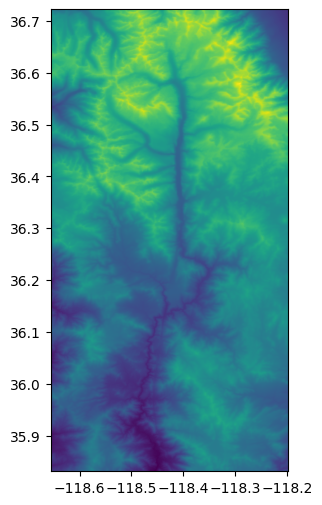

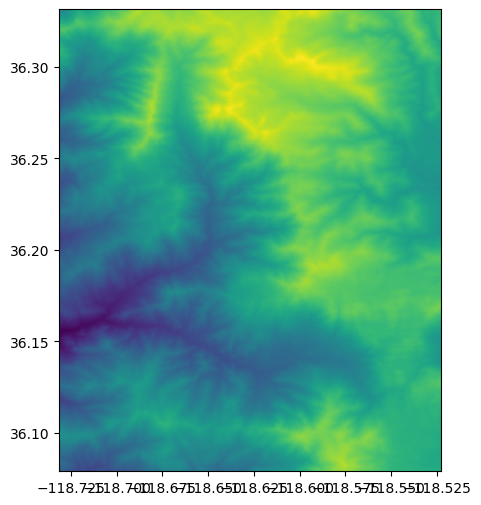

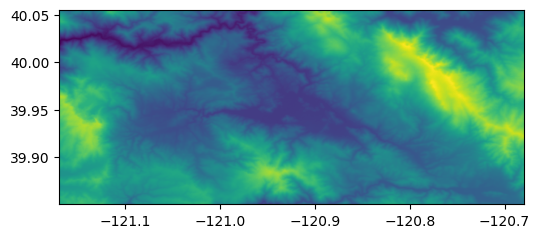

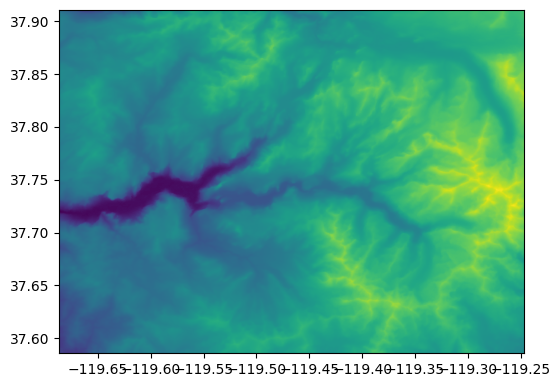

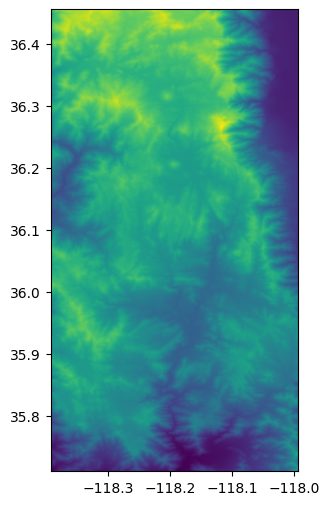

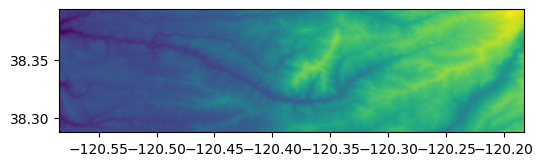

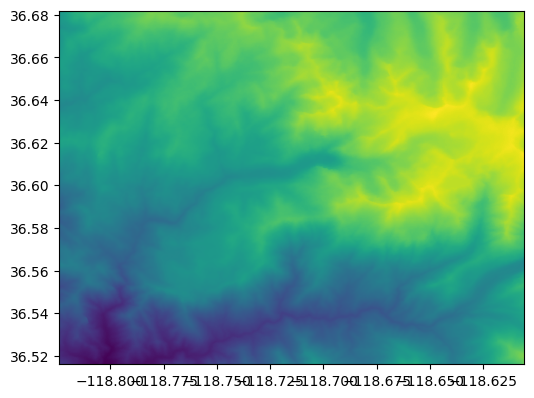

In [6]:
for tif in tif_dir.tifs:
    tif.plot()